
=== Sample 0 ===
True class: versicolor

Class: setosa


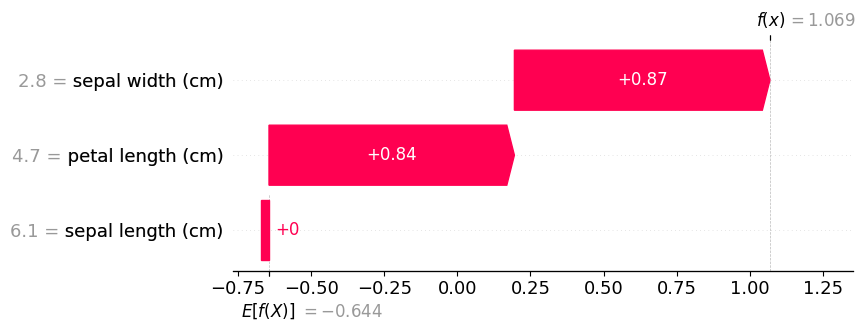


Class: versicolor


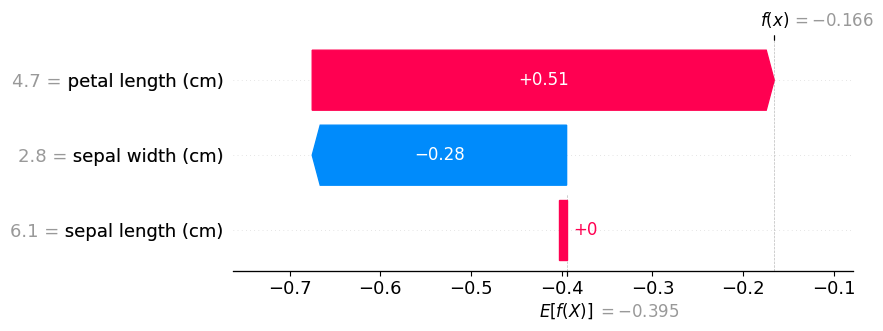


Class: virginica


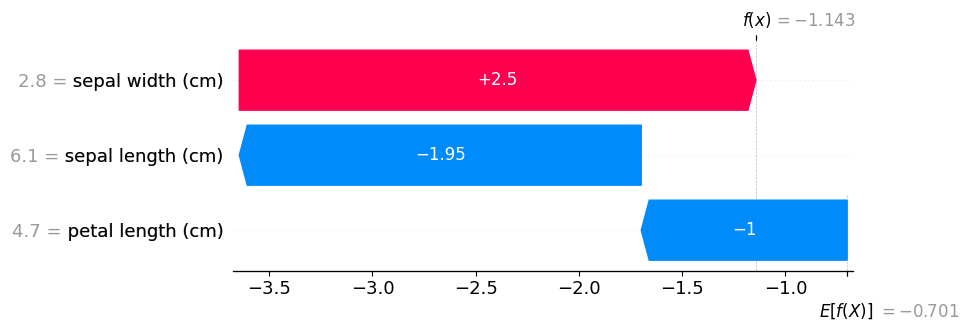


=== Sample 1 ===
True class: setosa

Class: setosa


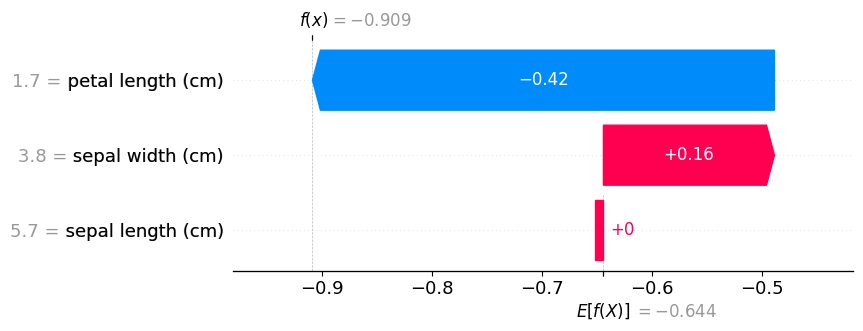


Class: versicolor


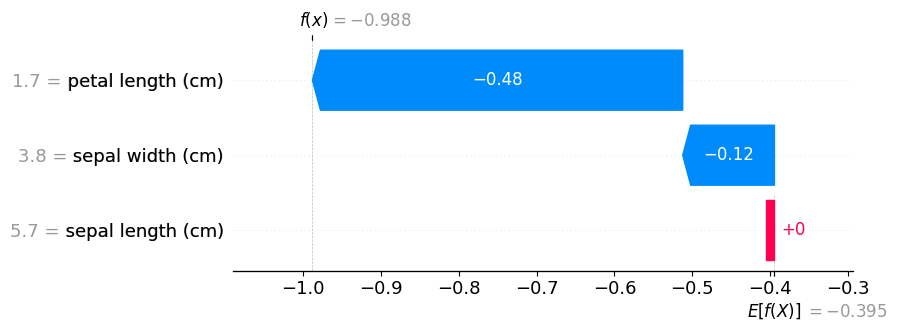


Class: virginica


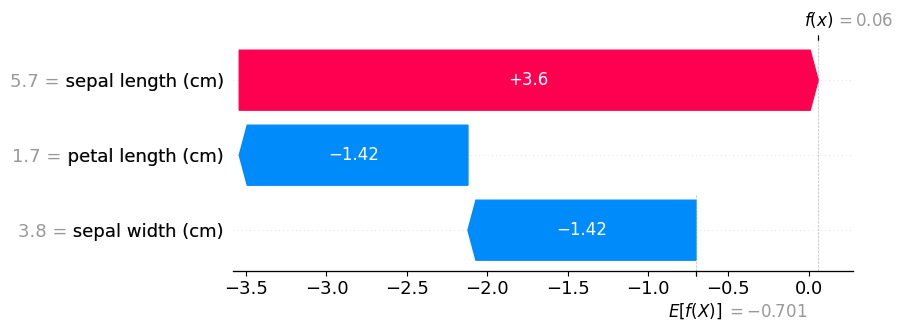


=== Sample 2 ===
True class: virginica

Class: setosa


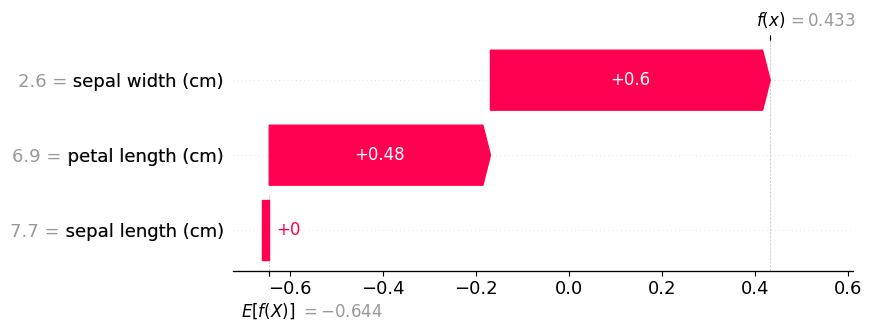


Class: versicolor


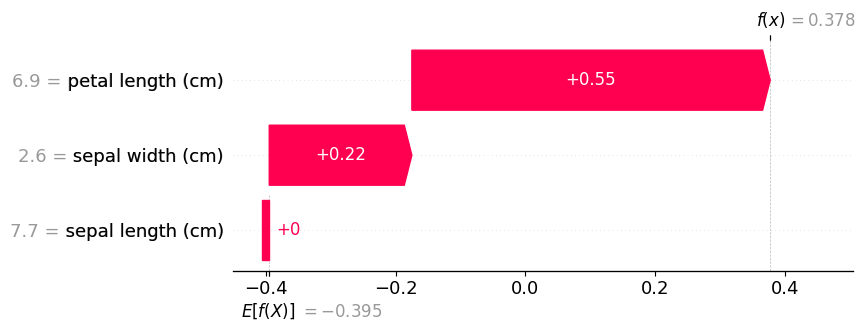


Class: virginica


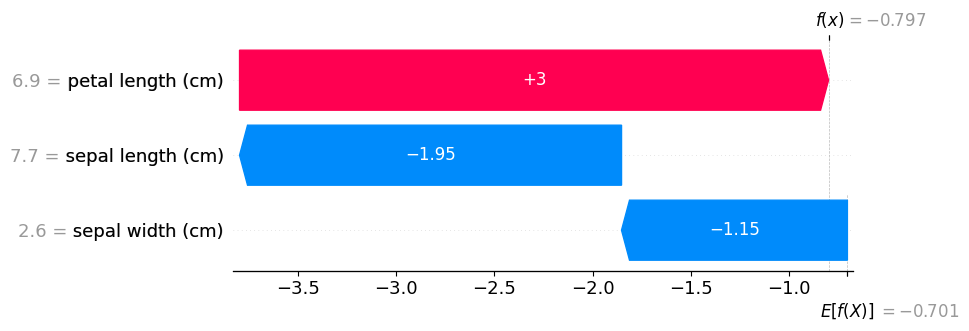


=== Sample 3 ===
True class: versicolor

Class: setosa


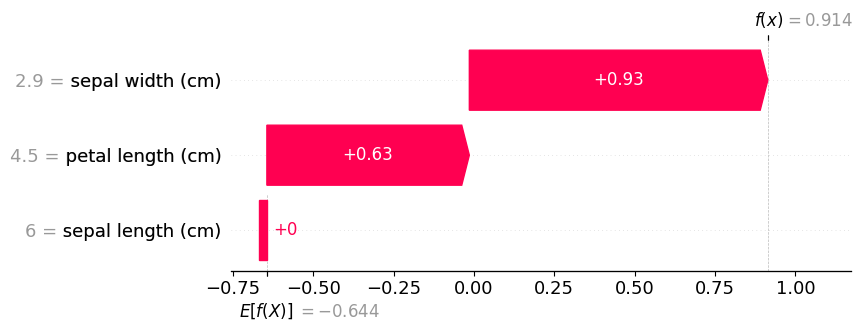


Class: versicolor


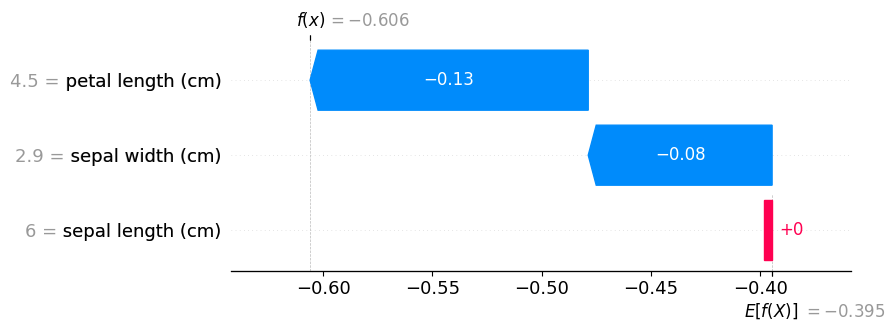


Class: virginica


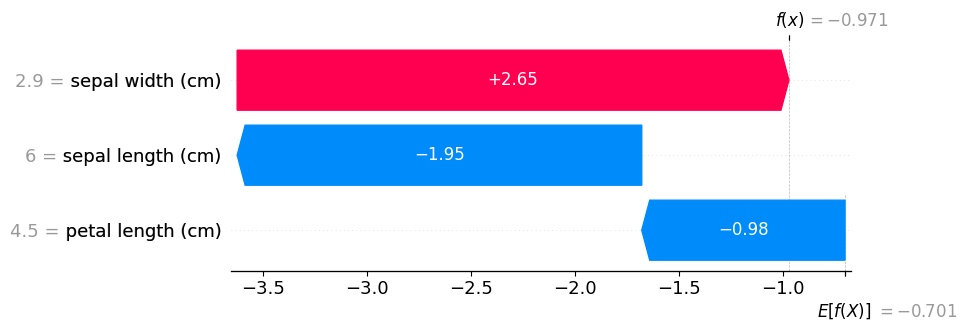


=== Sample 4 ===
True class: versicolor

Class: setosa


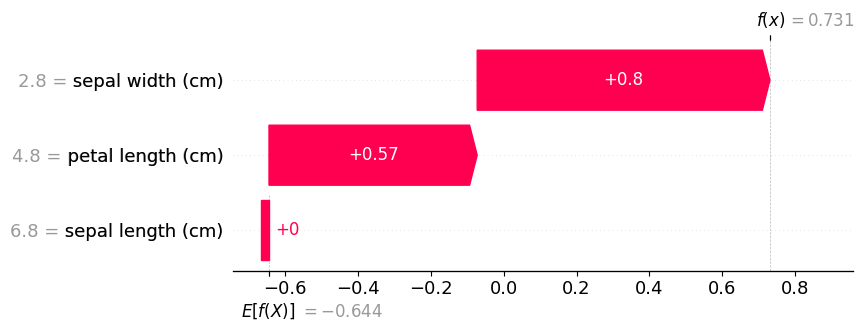


Class: versicolor


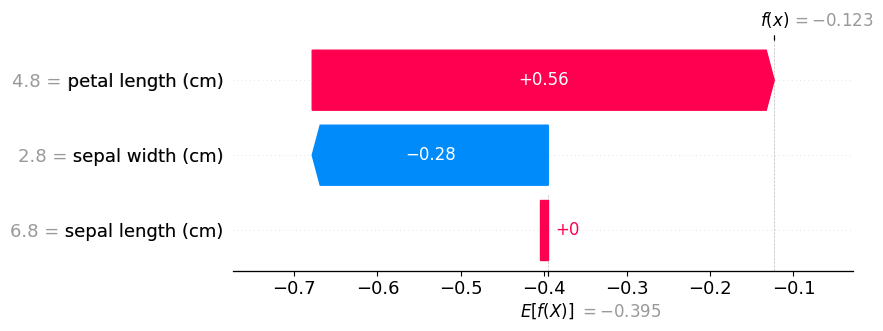


Class: virginica


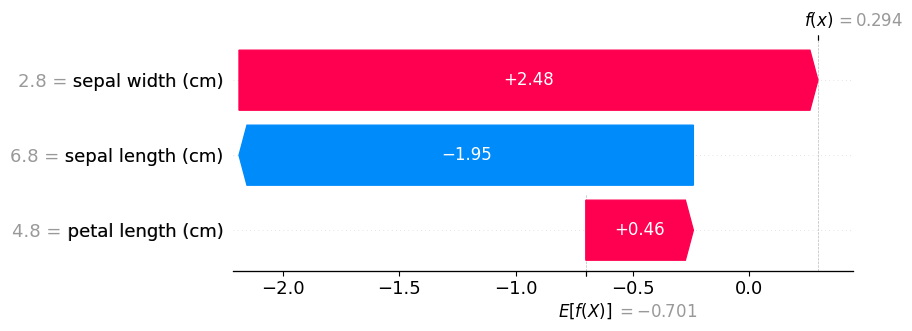

AttributeError: module 'shap.plots' has no attribute 'summary'

In [14]:
import shap
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# ------------------------------
# 1. Load dataset
# ------------------------------
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# 2. Train XGBoost model
# ------------------------------
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# ------------------------------
# 3. SHAP explainer
# ------------------------------
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)  # SHAP Explanation object

# ------------------------------
# 4. Visualize first 5 test samples
# ------------------------------
for sample_index in range(5):
    print(f"\n=== Sample {sample_index} ===")
    print(f"True class: {class_names[y_test[sample_index]]}")
    
    for cls_idx, cls_name in enumerate(class_names):
        print(f"\nClass: {cls_name}")
        shap.plots.waterfall(
            shap.Explanation(
                values=shap_values.values[sample_index, cls_idx, :],
                base_values=shap_values.base_values[sample_index, cls_idx],
                data=X_test[sample_index],
                feature_names=feature_names
            )
        )

# ------------------------------
# 5. Global feature importance (summary plot)
# ------------------------------
shap.plots.summary(shap_values)
